<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/p3_pandas_factory/Warehouse_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import numpy as np

In [3]:
os.getcwd()
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/blogs_medium')

In [4]:
!ls

 2019_outbound.xlsx	     KGT_4class.ipynb
 4_class_dataset.zip	    'Kopie von covid-19.ipynb'
 Barplot_examples.ipynb      LeNet_Gridsearch_cat_dog.ipynb
 binary_dataset.zip	     OCR.ipynb
 Binary_KGT.ipynb	     outbound.ipynb
 cat_dog.zip		     outbound.xlsx
 CNN_models		     Untitled0.ipynb
 coronavirus_germany.ipynb   vg2500_geo84.zip
 Gridsearch_cat_dag.ipynb    Visualization_coronavirus_germany.ipynb
 Hero2monster.ipynb


In [5]:
df2018= pd.read_excel("outbound.xlsx",sheet_name='2018',header=0)
df2019= pd.read_excel("outbound.xlsx",sheet_name='2019',header=0)
frames =[df2018, df2019]
df= pd.concat(frames)
df
os.chdir('/content')

In [6]:
df.columns = ['date','FAW','company','type','rolls','weight']
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date') 
print(df.head(2))
print(df.tail(2))
print(df.shape)

            FAW company type  rolls  weight
date                                       
2018-02-28  100     NaN  全长丝    100  2500.0
2018-03-01  150      永丰   半光    150  4209.6
            FAW company type  rolls  weight
date                                       
2019-12-31  140      华港  全长丝     97  2718.5
2019-12-31  120      天龙  全长丝     36   900.7
(675, 5)


In [7]:
print(df.resample('Y').agg(dict(rolls='sum', weight='sum')).to_period('Y'))
year_df = df.resample('Y').agg(dict(rolls='sum', weight='sum')).to_period('Y')

      rolls     weight
date                  
2018  32609   886817.1
2019  43109  1154630.2


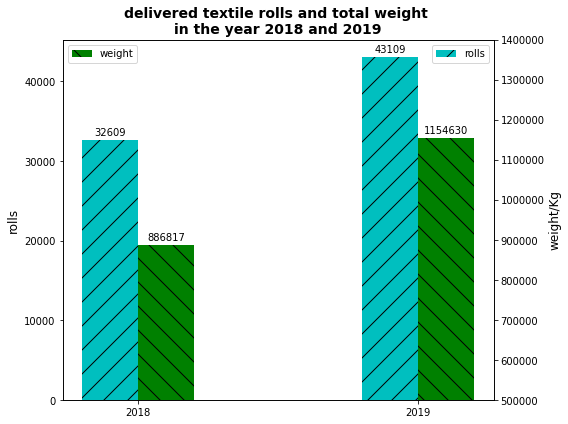

In [8]:
labels = ['2018', '2019']

x = np.arange(len(year_df))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, year_df['rolls'], width, label='rolls',color='c',hatch = '/')
ax2 = ax.twinx()
rects2 = ax2.bar(x + width/2, year_df['weight'], width, label='weight',color='g',hatch = '\\')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('rolls',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_ylabel('weight/Kg',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_title('delivered textile rolls and total weight \nin the year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xticks(x)
ax2.set_ylim([500000,1400000])
ax.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False,style='plain')
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
ax2.legend(loc='upper left')

def autolabel(rects,axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(round(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1,ax)
autolabel(rects2,ax2)
fig.tight_layout()
plt.savefig('barplot.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

In [9]:
df.resample('M').sum().to_period('M').index

PeriodIndex(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', name='date', freq='M')

In [10]:
month_df=df.resample('M').agg(dict(rolls='sum', weight='sum')).to_period('M')

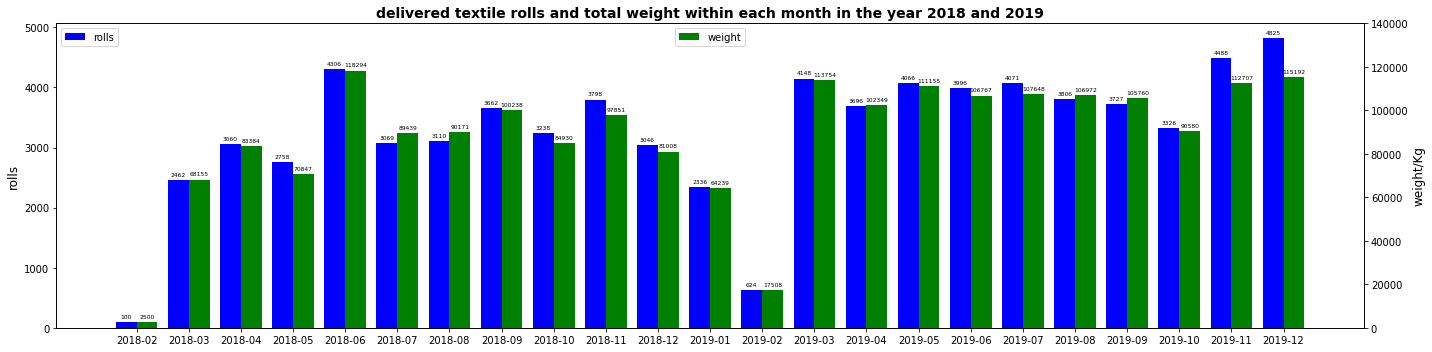

In [11]:
labels = month_df.index

x = np.arange(len(month_df))  # the label locations
width = 0.4  # the width of the bars
fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, month_df['rolls'], width, label='rolls',color='b')
ax2 = ax.twinx()
rects2 = ax2.bar(x + width/2, month_df['weight'], width, label='weight',color='g')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('rolls',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_ylabel('weight/Kg',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_title('delivered textile rolls and total weight within each month in the year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xticks(x)
ax2.set_ylim([0,140000])
ax.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False,style='plain')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax2.legend(loc='upper center')

def autolabel(rects,axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(round(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=6)
autolabel(rects1,ax)
autolabel(rects2,ax2)
fig.tight_layout()
plt.savefig('barplot1.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

In [144]:
print(df.resample('D').agg(dict(rolls='sum')).to_period('D'))

            rolls
date             
2018-02-28    100
2018-03-01    150
2018-03-02    180
2018-03-03      0
2018-03-04      0
...           ...
2019-12-27    275
2019-12-28      0
2019-12-29    267
2019-12-30      0
2019-12-31    224

[672 rows x 1 columns]


In [14]:
new_df=df.resample('D').agg(dict(rolls='sum')).to_period('D')
print(new_df.iloc[300:310,:])
rolls=new_df.iloc[:,0]
day_list = new_df.index
print(len(new_df))
print(rolls[0:10])

            rolls
date             
2018-12-25     45
2018-12-26      0
2018-12-27     80
2018-12-28    110
2018-12-29      0
2018-12-30    100
2018-12-31      0
2019-01-01    200
2019-01-02     90
2019-01-03    120
672
date
2018-02-28    100
2018-03-01    150
2018-03-02    180
2018-03-03      0
2018-03-04      0
2018-03-05      0
2018-03-06      0
2018-03-07     70
2018-03-08    100
2018-03-09      0
Freq: D, Name: rolls, dtype: int64


In [15]:
print(new_df)

            rolls
date             
2018-02-28    100
2018-03-01    150
2018-03-02    180
2018-03-03      0
2018-03-04      0
...           ...
2019-12-27    275
2019-12-28      0
2019-12-29    267
2019-12-30      0
2019-12-31    224

[672 rows x 1 columns]


In [18]:
outbound_df = new_df*(-1)
outbound_df

,rolls
date,
2018-02-28,-100
2018-03-01,-150
2018-03-02,-180
2018-03-03,0
2018-03-04,0
...,...
2019-12-27,-275
2019-12-28,0
2019-12-29,-267


In [108]:
print(type(day_list[0].end_time))
print((day_list[0].start_time))
print(datetime.datetime(2019,1,20))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-02-28 00:00:00
2019-01-20 00:00:00


In [117]:
import datetime
outbound_df = new_df*(-1)
for i,day in enumerate(day_list):
  if day.start_time == datetime.datetime(2019,1,20):
    vacation_start= i
  if day.year == 2018:
    warehouse_df.iloc[i,0]=sum(outbound_df.iloc[0:i+1,0])+109.27*(i+3)
  elif day.year == 2019 and day.start_time < datetime.datetime(2019,1,20):
    warehouse_df.iloc[i,0]=sum(outbound_df.iloc[0:i+1,0])+109.27*309+(i-307+3)*127.49
  elif day.start_time > datetime.datetime(2019,1,20) and day.start_time < datetime.datetime(2019,2,22):
    warehouse_df.iloc[i,0]=sum(outbound_df.iloc[0:i+1,0])+109.27*309+(vacation_start-307+3)*127.49
  elif day.start_time > datetime.datetime(2019,2,22):
    warehouse_df.iloc[i,0]=sum(outbound_df.iloc[0:i+1,0])+109.27*309+(i-307+3-34)*127.49

warehouse_df


,rolls
date,
2018-02-28,227.81
2018-03-01,187.08
2018-03-02,116.35
2018-03-03,225.62
2018-03-04,334.89
...,...
2019-12-27,481.64
2019-12-28,609.13
2019-12-29,469.62


In [118]:
round_warehouse_df= warehouse_df.astype('int32')
round_warehouse_df


,rolls
date,
2018-02-28,227
2018-03-01,187
2018-03-02,116
2018-03-03,225
2018-03-04,334
...,...
2019-12-27,481
2019-12-28,609
2019-12-29,469


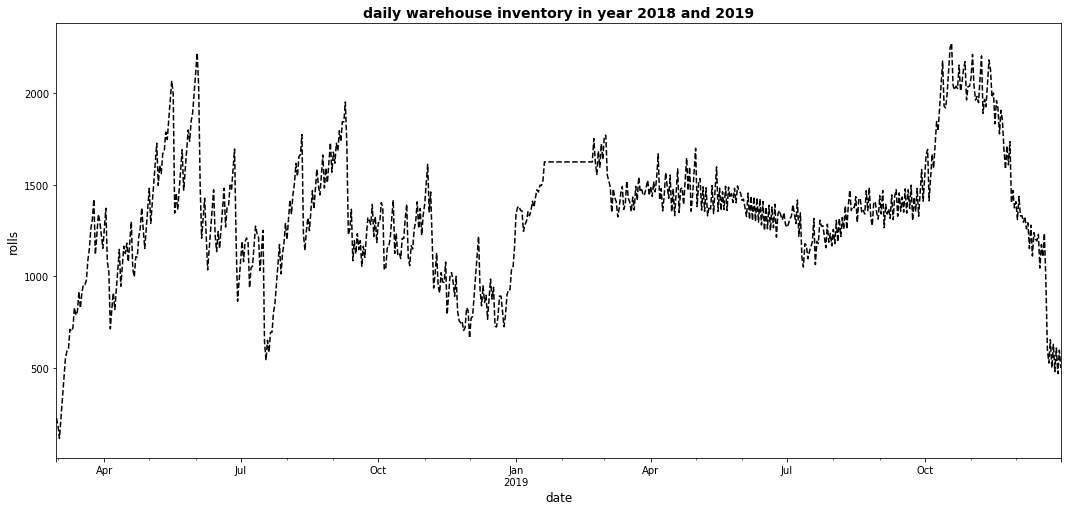

In [119]:
interpolated = round_warehouse_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))

ax= interpolated['rolls'].plot(style="k--", label="Series")

ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("rolls", fontsize=12)
ax.set_title('daily warehouse inventory in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

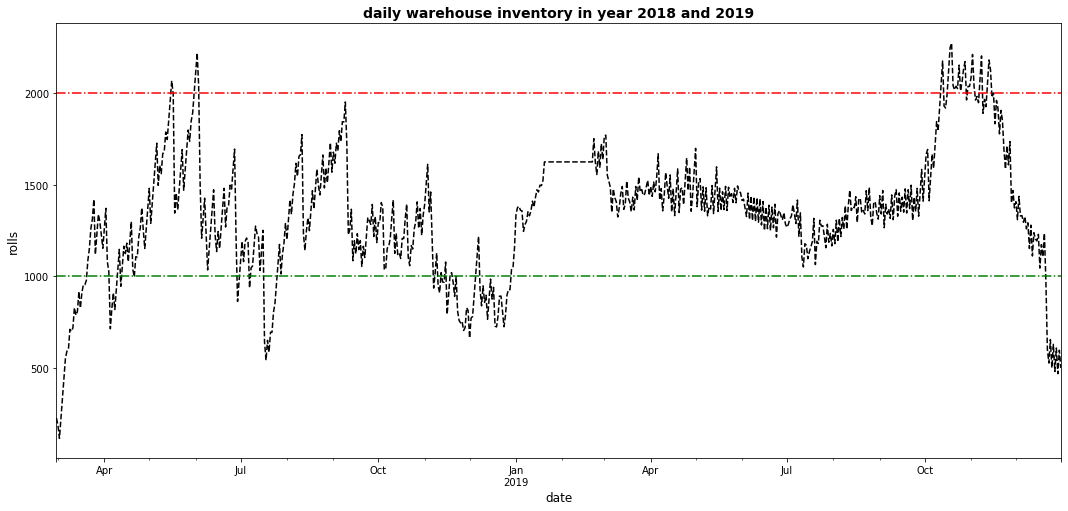

In [143]:
interpolated = round_warehouse_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
x = day_list 
y1 = [1000]*len(day_list)
y2 = [2000]*len(day_list)
ax= interpolated['rolls'].plot(style="k--", label="Series")
plt.plot(x,y1,'g-.')
plt.plot(x,y2,'r-.')
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("rolls", fontsize=12)
ax.set_title('daily warehouse inventory in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

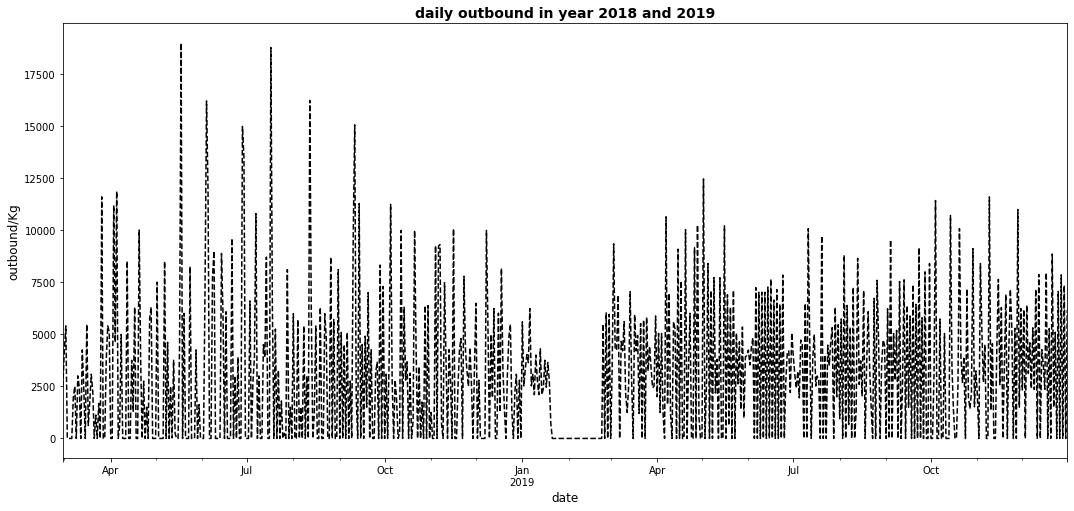

In [ ]:
interpolated = new_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
ax= interpolated['weight'].plot(style="k--", label="Series")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('daily outbound in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

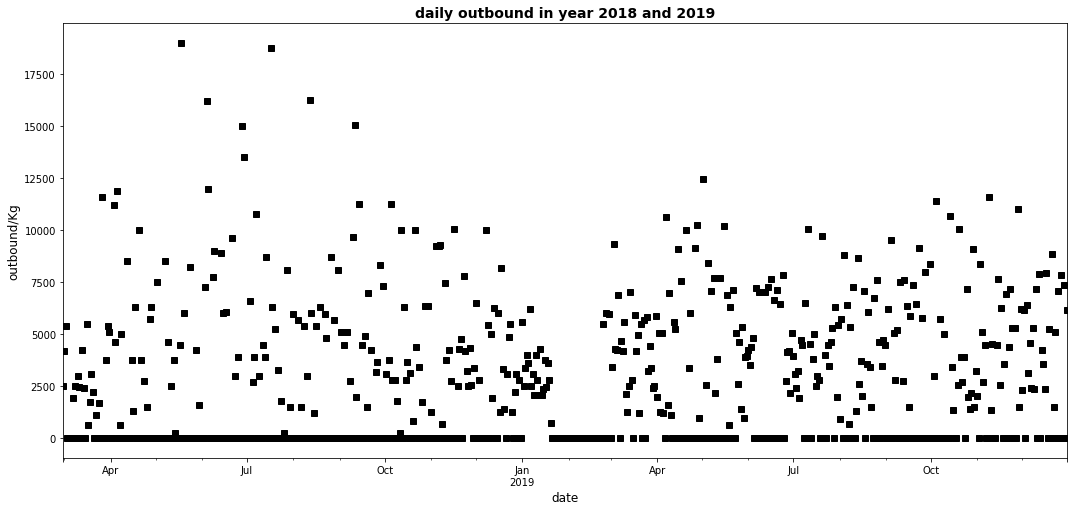

In [ ]:
interpolated = new_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
ax= interpolated['weight'].plot(style="ks")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('daily outbound in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot2.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
# find vacation in df
"""

day_2018, day_2019=0,0
for day in xlabels:
  if day.year == 2018:
    day_2018+=1
  else:
    day_2019+=1
print(day_2018, day_2019)
def find_vacation(day_df):
  free_day=[]
  t=0
  for x in range(len(day_df)):
    if day_df.iloc[x,0] ==0:
      t+=1
      if x!=len(day_df)-1:
        if day_df.iloc[x+1,0]!=0:
          free_day.append(t)
          t=0
      else:
        free_day.append(t)
  return free_day
x= find_vacation(new_df)
vacation_days_2019 = max(x)

a = pd.DataFrame( [[1,2], [0,5], [1,8],[0,1], [0,5], [1,8],[1,1],[0,0]], columns=['A', 'B'])
b =find_vacation(a)
print(a,'\n', x)
"""